# FTT model including constraint and learning

In this notebook the cell magic %latexmodelgrab is used. It allows the specification of segments of the model. 

In [1]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from IPython.core.display import HTML,Markdown,Latex


from modelclass import model
import modeljupytermagic

# some useful stuf
model.widescreen()
pd.set_option('display.max_rows', None, 'display.max_columns', 10, 'display.precision', 4)

## Define the segments of the model
By defining the a model as segments the whold model does not have to be defines in one cell. This simplifies the specification. 
And debugging.

As many segments will use the lists of technologies, segments which name starts 
with list will be appended to each segment. 

## Changes

- for each sector change demand to production
- calculate average cost for power generation 
- change the cost equations so the cost include learning 

### First the technologies are defined

In [3]:
%%latexmodelgrab mftt  ndisplay segment=list1

Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$


In [4]:
%%latexmodelgrab mftt  ndisplay segment=text1

Any number of technology can be specified (limited by the avaiable memory)

The time index $_t$ is implicit. 


Any number of technology can be specified (limited by the avaiable memory)

The time index $_t$ is implicit. 


### Preferences

In [5]:
%%latexmodelgrab mftt  ndisplay segment=preferences 

Each technology is compared to all other based on the percieved costs and the preferences (choice likelihood) $F^{i,j}$ are calculated.
    
For all technologies $F^{i,j}+F^{j,i} = 1 $

\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(Cost\_argumented^{i}-Cost\_argumented^{j})}{\sigma^{i,j}} )}
\end{equation}




Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$

Each technology is compared to all other based on the percieved costs and the preferences (choice likelihood) $F^{i,j}$ are calculated.
    
For all technologies $F^{i,j}+F^{j,i} = 1 $

\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(Cost\_argumented^{i}-Cost\_argumented^{j})}{\sigma^{i,j}} )}
\end{equation}



### Share dynamic 

In [6]:
%%latexmodelgrab mftt  ndisplay segment=Share 
\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (\frac{F^{i,j}}{\tau^{j}}
                           - \frac{F^{j,i}}{\tau^{i}}))
\end{equation}


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$
\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (\frac{F^{i,j}}{\tau^{j}}
                           - \frac{F^{j,i}}{\tau^{i}}))
\end{equation}


### Sigma

In [7]:
%%latexmodelgrab mftt  ndisplay segment=sigma 
The percieved width in the choice function

\begin{equation}
\label{eq:sigma}
\sigma^{i,j} = \sqrt{(\sigma^{i})^{(2)} \cdot (\sigma^{j})^{(2)}}
\end{equation}


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$
The percieved width in the choice function

\begin{equation}
\label{eq:sigma}
\sigma^{i,j} = \sqrt{(\sigma^{i})^{(2)} \cdot (\sigma^{j})^{(2)}}
\end{equation}


### Total Demand 

In [8]:
%%latexmodelgrab mftt  ndisplay segment=demand 

\begin{equation}
\label{eq:UD_total}
UsefulDemand\_total  = UsefulDemand\_total_{t-1} \cdot 
(1+\frac{UsefulDemand\_total\_growth}{100})
\end{equation}


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$

\begin{equation}
\label{eq:UD_total}
UsefulDemand\_total  = UsefulDemand\_total_{t-1} \cdot 
(1+\frac{UsefulDemand\_total\_growth}{100})
\end{equation}


### Production  

In [9]:
%%latexmodelgrab mftt  display segment=production 

The production from each sector can be calculated. The same goes fdor 

\begin{equation}
\label{eq:production}
Production^{i} = Share^{i} \cdot UsefulDemand\_total 
\end{equation}

\begin{equation}
\label{eq:acc_production}
Production\_accumulated^{i} = Production\_accumulated^{i}_{t-1} + Production^{i}
\end{equation}


The production from each sector can be calculated. The same goes fdor 

\begin{equation}
\label{eq:production}
Production^{i} = Share^{i} \cdot UsefulDemand\_total 
\end{equation}

\begin{equation}
\label{eq:acc_production}
Production\_accumulated^{i} = Production\_accumulated^{i}_{t-1} + Production^{i}
\end{equation}


## Creating this Template model

do i  $
  frml    <production> Production__{i} = Share__{i}*UsefulDemand_total $
enddo $ 
do i  $
  frml    <acc_production> Production_accumulated__{i} = Production_accumulated__{i}(-1) + Production__{i} $
enddo $ 
LIST I =    I  : OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL   / 
         FOSILE:   1   1  1  0  0  0  0  0 $
LIST J =    J  :  OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL $



## And this Business Logic Language  model


FRML <PRODUCTION> PRODUCTION__OIL = SHARE__OIL*USEFULDEMAND_TOTAL $
FRML <PRODUCTION> PRODUCTION__COAL = SHARE__COAL*USEFULDEMAND_TOTAL $
FRML <PRODUCTION> PRODUCTION__GAS = SHARE__GAS*USEFULDEMAND_TOTAL $
FRML <PRODUCTION> PRODUCTION__BIOMASS = SHARE__BIOMASS*USEFULDEMAND_TOTAL $
FRML <PRODUCTION> PRODUCTION__SOLAR = SHARE__SOLAR*USEFULDEMAND_TOTAL $
FRML <PRODUCTION> PRODUCTION__WIND = SHARE__WIND*USEFULDEMAND_TOTAL $
FRML <PRODUCTION> PRODUCTION__HYDRO = SHARE__HYDRO*USEFULDEMAND_TOTAL $
FRML <PRODUCTION> PRODUCTION__GEOTHERMAL = SHARE__GEOTHERMAL*USEFULDEMAND_TOTAL $



FRML <ACC_PRODUCTION> PRODUCTION_ACCUMULATED__OIL = PRODUCTION_ACCUMULATED__OIL(-1) + PRODUCTION__OIL $
FRML <ACC_PRODUCTION> PRODUCTION_ACCUMULATED__COAL = PRODUCTION_ACCUMULATED__COAL(-1) + PRODUCTION__COAL $
FRML <ACC_PRODUCTION> PRODUCTION_ACCUMULATED__GAS = PRODUCTION_ACCUMULATED__GAS(-1) + PRODUCTION__GAS $
FRML <ACC_PRODUCTION> PRODUCTION_ACCUMULATED__BIOMASS = PRODUCTION_ACCUMULATED__BIOMASS(-1) + PRODUCTIO

### price learning 

In [10]:
%%latexmodelgrab mftt  ndisplay segment=endogeneous_prices 

The price of new technology falls in line with its accumulated use through a number of effects.

In princip it depends in global accumulated production. But lacking the data, we just use the local accumulated production. There are many
possible functional forms. This is just one example. 

\begin{equation}
\label{eq:change_production}
Change\_accumulated\_Production^{i} = \frac{Production\_accumulated^{i}}{Production\_accumulated^{i}_{t-1}}
\end{equation}

\begin{equation}
\label{eq:price_impact}
Cost^{i} = Cost^{i}_{t-1} \cdot (Change\_accumulated\_Production^{i})^{(-cost\_elasticity^{i})} 
\end{equation}


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$

The price of new technology falls in line with its accumulated use through a number of effects.

In princip it depends in global accumulated production. But lacking the data, we just use the local accumulated production. There are many
possible functional forms. This is just one example. 

\begin{equation}
\label{eq:change_production}
Change\_accumulated\_Production^{i} = \frac{Production\_accumulated^{i}}{Production\_accumulated^{i}_{t-1}}
\end{equation}

\begin{equation}
\label{eq:price_impact}
Cost^{i} = Cost^{i}_{t-1} \cdot (Change\_accumulated\_Production^{i})^{(-cost\_elasticity^{i})} 
\end{equation}


### Imposing min and max shares  

In [11]:
%%latexmodelgrab mftt  ndisplay segment=min_max 

Sometime there can be constarint (min and/or max) on the shares (or the demand). To enforce constraints
 - a penalty is added to the percieved cost if the share violate the max constrain.  
 - a deduction is subtracted from the cost if the shares violates the min constrain. .  



We really want to have this equations: 
\begin{equation}
\label{eqno:maxout}
\underbrace{penalty\_max^{i}}_{Penalty\_max} =  20 * (Share^{i} > Share\_max^{i}) 
\end{equation}

However in order to get more numerical stability an equation which smooth out the logical expression: $Share^{i} > Share\_max^{i}$  is used: 

\begin{equation}
\label{eq:maxoutlogit}
\underbrace{penalty\_max\_l^{i}}_{Penalty\_max} =  1000 * logit^{-1}(1000*(Share^{i} - Share\_max^{i})) 
\end{equation}



We want this
\begin{equation}
\label{eqno:minout}
deduction\_min^{i} = Cost^{i}* 0.99 * (Share^{i} < Share\_min^{i})
\end{equation}

And implement it like this

\begin{equation}
\label{eq:minoutlogit}
deduction\_min\_l^{i} = Cost^{i}* 0.99 * logit^{-1}(100*(Share\_min^{i}-Share^{i})  )
\end{equation}




which is the value which enters the equation for prefereences ($F^{i,j}$)




Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$

Sometime there can be constarint (min and/or max) on the shares (or the demand). To enforce constraints
 - a penalty is added to the percieved cost if the share violate the max constrain.  
 - a deduction is subtracted from the cost if the shares violates the min constrain. .  



We really want to have this equations: 
\begin{equation}
\label{eqno:maxout}
\underbrace{penalty\_max^{i}}_{Penalty\_max} =  20 * (Share^{i} > Share\_max^{i}) 
\end{equation}

However in order to get more numerical stability an equation which smooth out the logical expression: $Share^{i} > Share\_max^{i}$  is used: 

\begin{equation}
\label{eq:maxoutlogit}
\underbrace{penalty\_max\_l^{i}}_{Penalty\_max} =  1000 * logit^{-1}(1000*(Share^{i} - Share\_max^{i})) 
\end{equation}



We want this
\begin{equation}
\label{eqno:minout}
deduction\_min^{i} = Cost^{i}* 0.99 * (Share^{i} < Share\_min^{i})
\end{equation}

And implement it like this

\begin{equation}
\label{eq:minoutlogit}
deduction\_min\_l^{i} = Cost^{i}* 0.99 * logit^{-1}(100*(Share\_min^{i}-Share^{i})  )
\end{equation}




which is the value which enters the equation for prefereences ($F^{i,j}$)



### Argumented cost 

In [12]:
%%latexmodelgrab mftt  ndisplay segment=Argumented_cost 

\begin{equation}
\label{eq:Z_costbarrier}
Cost\_argumented^{i} = Cost^{i} +  penalty\_max\_l^{i} -  deduction\_min\_l^{i}
\end{equation}


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$

\begin{equation}
\label{eq:Z_costbarrier}
Cost\_argumented^{i} = Cost^{i} +  penalty\_max\_l^{i} -  deduction\_min\_l^{i}
\end{equation}


### Average cost 

In [13]:
%%latexmodelgrab mftt  display segment=average_cost 

To feed into the main model the average cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 

\begin{equation}
\label{eq:Average_cost}
Cost\_average = \sum_{i}(Cost^{i} \cdot Share^{i} ) 
\end{equation}



To feed into the main model the average cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 

\begin{equation}
\label{eq:Average_cost}
Cost\_average = \sum_{i}(Cost^{i} \cdot Share^{i} ) 
\end{equation}


## Creating this Template model

frml <Average_cost> Cost_average = sum(i,Cost__{i}*Share__{i} ) $
LIST I =    I  : OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL   / 
         FOSILE:   1   1  1  0  0  0  0  0 $
LIST J =    J  :  OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL $



## And this Business Logic Language  model

FRML <AVERAGE_COST> COST_AVERAGE = (COST__OIL*SHARE__OIL +COST__COAL*SHARE__COAL +COST__GAS*SHARE__GAS +COST__BIOMASS*SHARE__BIOMASS +COST__SOLAR*SHARE__SOLAR +COST__WIND*SHARE__WIND +COST__HYDRO*SHARE__HYDRO +COST__GEOTHERMAL*SHARE__GEOTHERMAL ) $
LIST I =    I  : OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL   / 
         FOSILE:   1   1  1  0  0  0  0  0 $
LIST J =    J  :  OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL $



### Max cost 

In [14]:
%%latexmodelgrab mftt  ndisplay segment=max_cost 

To feed into the main model the max cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 


\begin{equation}
\label{eq:max_cost}
max\_total  = \max_{i}(Share^{i}) 
\end{equation}


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$

To feed into the main model the max cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 


\begin{equation}
\label{eq:max_cost}
max\_total  = \max_{i}(Share^{i}) 
\end{equation}


### Check, that the shares add up to one. 

In [15]:
%%latexmodelgrab mftt  ndisplay segment=check 

\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share^{i})
\end{equation}


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$

\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share^{i})
\end{equation}


### Create the share for fosile fuels 

In [16]:
%%latexmodelgrab mftt  ndisplay segment=fosile 

\begin{equation}
\label{eq:share_fosile}
Share\_\_fosile  = \sum_{i=fosile}(Share^{i})
\end{equation}


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$

\begin{equation}
\label{eq:share_fosile}
Share\_\_fosile  = \sum_{i=fosile}(Share^{i})
\end{equation}


### Create equations just for fosile fuels

In [17]:
%%latexmodelgrab mftt  ndisplay segment=fosilesharetest 

\begin{equation}
\label{eq:SHARES3}
\forall [i=fosile]\:\:  fosileshare^{i} = Share^{i} 
\end{equation}




Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$

\begin{equation}
\label{eq:SHARES3}
\forall [i=fosile]\:\:  fosileshare^{i} = Share^{i} 
\end{equation}



## Combine all the segments

In [18]:
%%latexmodelgrab mftt  ndisplay render=False
# Combined model

In [19]:
display(Markdown(mftt.equations_latex))


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$


Any number of technology can be specified (limited by the avaiable memory)

The time index $_t$ is implicit. 


Each technology is compared to all other based on the percieved costs and the preferences (choice likelihood) $F^{i,j}$ are calculated.
    
For all technologies $F^{i,j}+F^{j,i} = 1 $

\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(Cost\_argumented^{i}-Cost\_argumented^{j})}{\sigma^{i,j}} )}
\end{equation}


\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (\frac{F^{i,j}}{\tau^{j}}
                           - \frac{F^{j,i}}{\tau^{i}}))
\end{equation}

The percieved width in the choice function

\begin{equation}
\label{eq:sigma}
\sigma^{i,j} = \sqrt{(\sigma^{i})^{(2)} \cdot (\sigma^{j})^{(2)}}
\end{equation}


\begin{equation}
\label{eq:UD_total}
UsefulDemand\_total  = UsefulDemand\_total_{t-1} \cdot 
(1+\frac{UsefulDemand\_total\_growth}{100})
\end{equation}


The production from each sector can be calculated. The same goes fdor 

\begin{equation}
\label{eq:production}
Production^{i} = Share^{i} \cdot UsefulDemand\_total 
\end{equation}

\begin{equation}
\label{eq:acc_production}
Production\_accumulated^{i} = Production\_accumulated^{i}_{t-1} + Production^{i}
\end{equation}


The price of new technology falls in line with its accumulated use through a number of effects.

In princip it depends in global accumulated production. But lacking the data, we just use the local accumulated production. There are many
possible functional forms. This is just one example. 

\begin{equation}
\label{eq:change_production}
Change\_accumulated\_Production^{i} = \frac{Production\_accumulated^{i}}{Production\_accumulated^{i}_{t-1}}
\end{equation}

\begin{equation}
\label{eq:price_impact}
Cost^{i} = Cost^{i}_{t-1} \cdot (Change\_accumulated\_Production^{i})^{(-cost\_elasticity^{i})} 
\end{equation}


Sometime there can be constarint (min and/or max) on the shares (or the demand). To enforce constraints
 - a penalty is added to the percieved cost if the share violate the max constrain.  
 - a deduction is subtracted from the cost if the shares violates the min constrain. .  



We really want to have this equations: 
\begin{equation}
\label{eqno:maxout}
\underbrace{penalty\_max^{i}}_{Penalty\_max} =  20 * (Share^{i} > Share\_max^{i}) 
\end{equation}

However in order to get more numerical stability an equation which smooth out the logical expression: $Share^{i} > Share\_max^{i}$  is used: 

\begin{equation}
\label{eq:maxoutlogit}
\underbrace{penalty\_max\_l^{i}}_{Penalty\_max} =  1000 * logit^{-1}(1000*(Share^{i} - Share\_max^{i})) 
\end{equation}



We want this
\begin{equation}
\label{eqno:minout}
deduction\_min^{i} = Cost^{i}* 0.99 * (Share^{i} < Share\_min^{i})
\end{equation}

And implement it like this

\begin{equation}
\label{eq:minoutlogit}
deduction\_min\_l^{i} = Cost^{i}* 0.99 * logit^{-1}(100*(Share\_min^{i}-Share^{i})  )
\end{equation}




which is the value which enters the equation for prefereences ($F^{i,j}$)



\begin{equation}
\label{eq:Z_costbarrier}
Cost\_argumented^{i} = Cost^{i} +  penalty\_max\_l^{i} -  deduction\_min\_l^{i}
\end{equation}


To feed into the main model the average cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 

\begin{equation}
\label{eq:Average_cost}
Cost\_average = \sum_{i}(Cost^{i} \cdot Share^{i} ) 
\end{equation}


To feed into the main model the max cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 


\begin{equation}
\label{eq:max_cost}
max\_total  = \max_{i}(Share^{i}) 
\end{equation}


\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share^{i})
\end{equation}


\begin{equation}
\label{eq:share_fosile}
Share\_\_fosile  = \sum_{i=fosile}(Share^{i})
\end{equation}


\begin{equation}
\label{eq:SHARES3}
\forall [i=fosile]\:\:  fosileshare^{i} = Share^{i} 
\end{equation}



### All phases of the combined model can be displayed:

In [20]:
if 0: 
    mftt_latex_model_instance.show

## Create some input data and start values 

In [21]:
%%dataframe  startvalues  show  periods=2  melt t
                share_  Production_accumulated_
Oil           0.0828         100
Coal          0.0000         100
Gas           0.0000         100 
Biomass       0.0101         100
Solar         0.0085         100
Wind          0.1276         100
Hydro         0.3381         100
Geothermal    0.4329         100

,OIL,COAL,GAS,BIOMASS,SOLAR,WIND,HYDRO,GEOTHERMAL
SHARE_,0.0828,0.0,0.0,0.0101,0.0085,0.1276,0.3381,0.4329
PRODUCTION_ACCUMULATED_,100.0000,100.0,100.0,100.0000,100.0000,100.0000,100.0000,100.0000


var_name,SHARE__OIL,PRODUCTION_ACCUMULATED__OIL,SHARE__COAL,PRODUCTION_ACCUMULATED__COAL,SHARE__GAS,...,PRODUCTION_ACCUMULATED__WIND,SHARE__HYDRO,PRODUCTION_ACCUMULATED__HYDRO,SHARE__GEOTHERMAL,PRODUCTION_ACCUMULATED__GEOTHERMAL
index,,,,,,,,,,,
2021,0.0828,100.0,0.0,100.0,0.0,...,100.0,0.3381,100.0,0.4329,100.0
2022,0.0828,100.0,0.0,100.0,0.0,...,100.0,0.3381,100.0,0.4329,100.0


In [22]:
%%dataframe  exoinit  nshow  periods=100 
USEFULDEMAND_TOTAL  USEFULDEMAND_TOTAL_GROWTH 
     100                    2

In [23]:
%%dataframe  exoparam   nshow  periods=100 melt
                Oil     Coal    Gas      Biomass     Solar   Wind   Hydro     Geothermal
Cost_          83.5     83.5   70.1        134.0     96.9    81.8   108.0       102.5
Sigma_         28.1     28.1   25.0        106.6     48.4    46.1    77.1        36.0
Tau_           40.0     40.0   30.0         40.0     25.0    25.0    80.0        40.0
share_max_      200       200   200         200       200     200     200         200
share_min_      -10      -100  -100        -100      -100    -100    -100         -100

In [24]:
baseline = pd.concat([startvalues_melted,exoparam_melted,exoinit],axis=1).fillna(0).pipe(lambda df:df.loc[:,sorted(df.columns)])
baseline.head().T

index,2021,2022,2023,2024,2025
COST__BIOMASS,134.0000,134.0000,134.0,134.0,134.0
COST__COAL,83.5000,83.5000,83.5,83.5,83.5
COST__GAS,70.1000,70.1000,70.1,70.1,70.1
COST__GEOTHERMAL,102.5000,102.5000,102.5,102.5,102.5
COST__HYDRO,108.0000,108.0000,108.0,108.0,108.0
COST__OIL,83.5000,83.5000,83.5,83.5,83.5
COST__SOLAR,96.9000,96.9000,96.9,96.9,96.9
COST__WIND,81.8000,81.8000,81.8,81.8,81.8
PRODUCTION_ACCUMULATED__BIOMASS,100.0000,100.0000,0.0,0.0,0.0
PRODUCTION_ACCUMULATED__COAL,100.0000,100.0000,0.0,0.0,0.0


## Some housekeeping 

In [25]:
sigma_names = ' '.join(name for name in mftt.exogene if name.startswith('SIGMA'))
tau_names = ' '.join(name for name in mftt.exogene if name.startswith('TAU'))

print(sigma_names)
print(tau_names)

SIGMA__SOLAR SIGMA__HYDRO SIGMA__COAL SIGMA__GEOTHERMAL SIGMA__GAS SIGMA__BIOMASS SIGMA__OIL SIGMA__WIND
TAU__COAL TAU__GEOTHERMAL TAU__HYDRO TAU__GAS TAU__BIOMASS TAU__OIL TAU__SOLAR TAU__WIND


In [26]:
mftt.group_dict = {
    'share__[!M]* share_total' : 'Shares',
    'c_t* cost*'   :  'Cost' ,
    'useful*':  'Demand',
    'pro*':  'Production',
    'deduct*':  'cost deduction for minimum ',
    'penal*':  'cost penalty  for maximum ',
    '*'      :  'all'
}

## Make a baseline solution 

In [27]:
mftt.keep_solutions = {}   # to clean up with new experiments
res = mftt(baseline,silent=1,first_test=10,init=True,keep='Baseline',alfa=0.1,ljit=0)

## Create some senarios

In [28]:
mftt.keep_solutions = {}   # to clean up with new experiments
    
lookat = 'hydro'
for change_cost in [0.0 , -10.0, -25.0, -50.0 , 10.0 , 25.0, 50.0]:
    alternative = baseline.upd(f'''cost__{lookat} %  {change_cost}
                                   share_max__hydro = 0.4 
                                   {sigma_names} = 10
                                   {tau_names}  = 5 
                                   ''')
    _ = mftt(alternative,keep = f'Cost of {lookat} up {change_cost}%',
             alfa=0.1,max_iterations=300,silent=1)

## Display the results 

In [29]:
mftt.keep_show(select_scenario=1)

## Look at the plots of shares

In [30]:
sharenames = [name for name in mftt.endogene if name.startswith('SHARE__') and not ('_M' in name or '_FOSILE' in name or '_TOTAL' in name)]

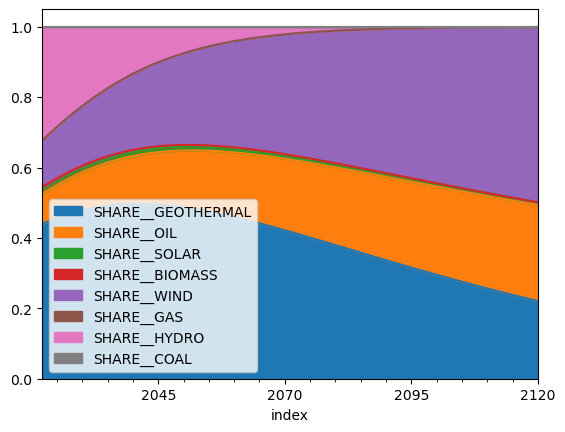

In [31]:
mftt[sharenames].df.plot.area();

## Waterfall plots of share changes

In [32]:
share_out = (100*pd.concat([ pd.DataFrame(df.loc['2120',sharenames] -df.loc['2021',sharenames],columns= [scenario]) 
                       for scenario,df in mftt.keep_solutions.items()]
                      ,axis=1).
                       pipe(lambda df: df.rename({i:i.split('__')[1] for i in df.index}))) 

display(Markdown(share_out.to_html()))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Cost of hydro up 0.0%</th>
      <th>Cost of hydro up -10.0%</th>
      <th>Cost of hydro up -25.0%</th>
      <th>Cost of hydro up -50.0%</th>
      <th>Cost of hydro up 10.0%</th>
      <th>Cost of hydro up 25.0%</th>
      <th>Cost of hydro up 50.0%</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>GEOTHERMAL</th>
      <td>-23.3742</td>
      <td>-26.2684</td>
      <td>-29.9775</td>
      <td>-30.0036</td>
      <td>-22.1042</td>
      <td>-21.4650</td>
      <td>-21.2150</td>
    </tr>
    <tr>
      <th>OIL</th>
      <td>16.5962</td>
      <td>12.9678</td>
      <td>8.2624</td>
      <td>8.2117</td>
      <td>18.1410</td>
      <td>18.8505</td>
      <td>19.0183</td>
    </tr>
    <tr>
      <th>SOLAR</th>
      <td>-0.1726</td>
      <td>-0.2713</td>
      <td>-0.3982</td>
      <td>-0.3993</td>
      <td>-0.1297</td>
      <td>-0.1086</td>
      <td>-0.1013</td>
    </tr>
    <tr>
      <th>BIOMASS</th>
      <td>-0.9866</td>
      <td>-0.9899</td>
      <td>-0.9940</td>
      <td>-0.9940</td>
      <td>-0.9851</td>
      <td>-0.9843</td>
      <td>-0.9838</td>
    </tr>
    <tr>
      <th>WIND</th>
      <td>32.6422</td>
      <td>26.0231</td>
      <td>17.4285</td>
      <td>17.3331</td>
      <td>35.4524</td>
      <td>36.7319</td>
      <td>37.0153</td>
    </tr>
    <tr>
      <th>GAS</th>
      <td>0.0000</td>
      <td>0.0000</td>
      <td>0.0000</td>
      <td>0.0000</td>
      <td>0.0000</td>
      <td>0.0000</td>
      <td>0.0000</td>
    </tr>
    <tr>
      <th>HYDRO</th>
      <td>-24.7049</td>
      <td>-11.4613</td>
      <td>5.6788</td>
      <td>5.8521</td>
      <td>-30.3744</td>
      <td>-33.0246</td>
      <td>-33.7336</td>
    </tr>
    <tr>
      <th>COAL</th>
      <td>0.0000</td>
      <td>0.0000</td>
      <td>0.0000</td>
      <td>0.0000</td>
      <td>0.0000</td>
      <td>0.0000</td>
      <td>0.0000</td>
    </tr>
  </tbody>
</table>

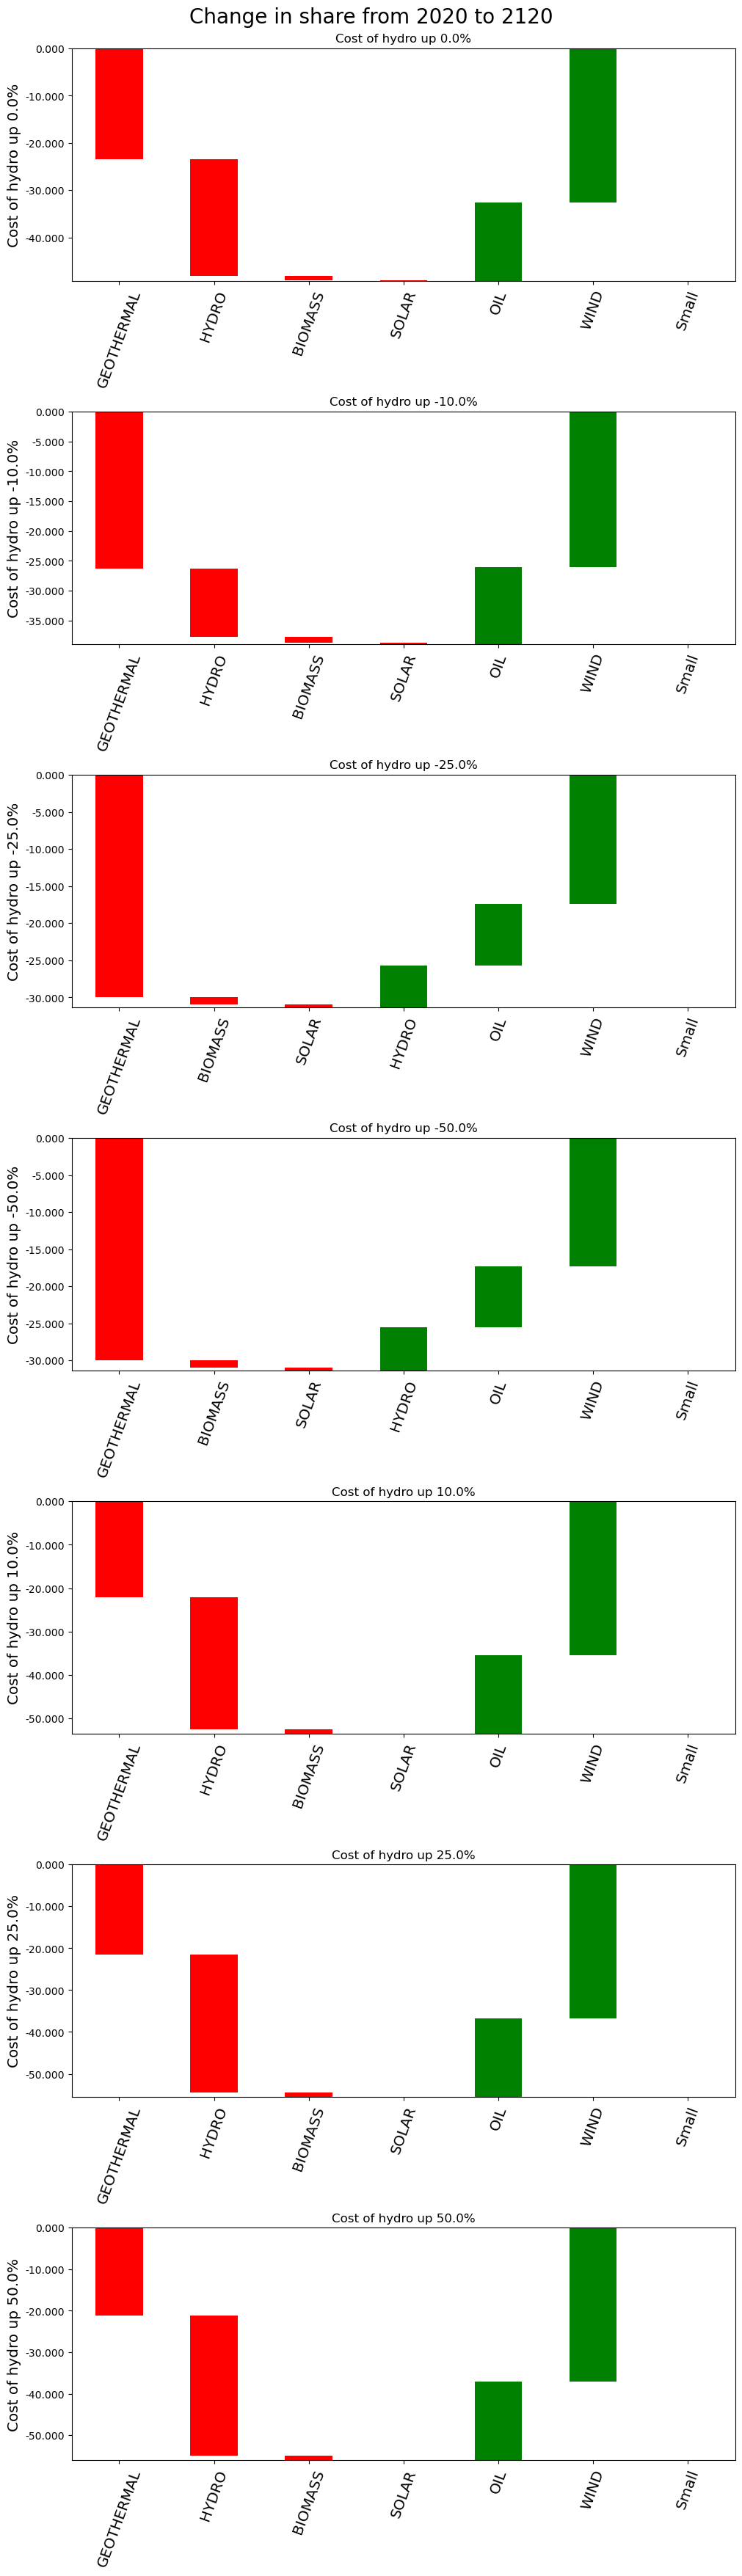

In [33]:
from modelvis import waterplot
fig = waterplot(share_out,title='Change in share from 2020 to 2120',threshold=0.001);
#fig.set_constrained_layout(True)

In [34]:
mftt['production_ac*']   

In [35]:
2+2

4